### Modéle Prédectif CNN des Fruits

## AMAGOUR Meriem

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-01-02 10:51:00.202744: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/meriemamagour/Desktop/Models/Fruits/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#Step 1: DataSet

In [2]:
import tensorflow as tf

# Définir les paramètres
img_height, img_width = 32, 32
batch_size = 20

# Charger les ensembles de données
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/Users/meriemamagour/Desktop/Models/Fruits/fruits/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/Users/meriemamagour/Desktop/Models/Fruits/fruits/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    "/Users/meriemamagour/Desktop/Models/Fruits/fruits/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Afficher les classes détectées
print("Classes dans les ensembles de données :")
print(train_dataset.class_names)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Classes dans les ensembles de données :
['apple', 'banana', 'orange']


#step 2 : Visualisation des données

2025-01-02 10:51:50.704879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


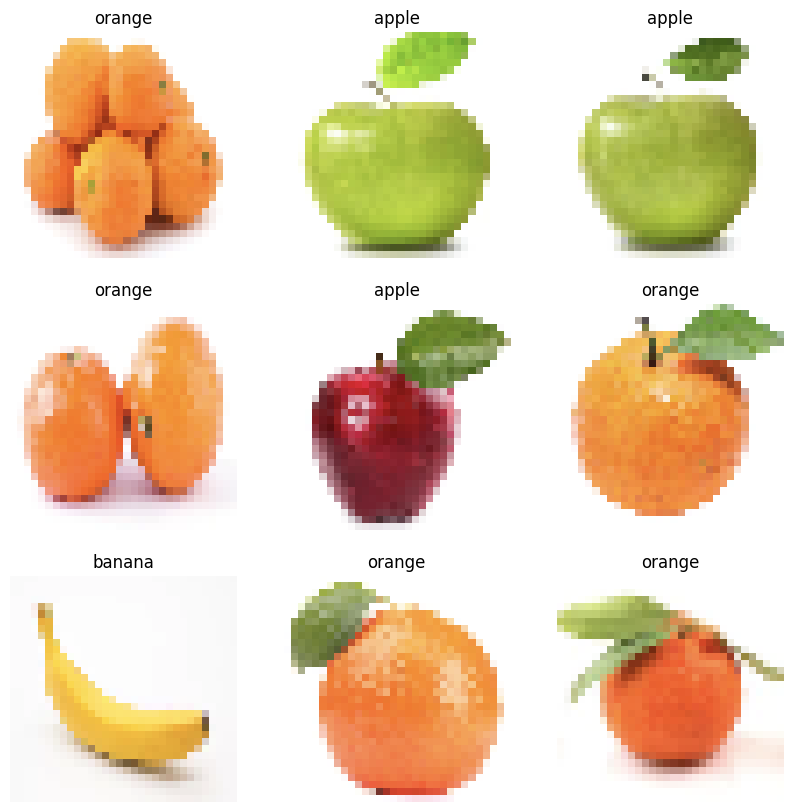

In [3]:
import matplotlib.pyplot as plt

# Récupérer les noms des classes depuis le dataset (ou définir explicitement si nécessaire)
class_names = train_dataset.class_names

# Afficher un échantillon d'images avec leurs étiquettes
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):  # Obtenir un lot
    for i in range(9):  # Afficher les 9 premières images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convertir en image
        plt.title(class_names[labels[i].numpy()])  # Convertir l'étiquette en entier
        plt.axis("off")
plt.show()


#step 3: Creation de modèle

In [7]:
import tensorflow as tf

modelCNN = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 3)),  # Normalisation des pixels
    tf.keras.layers.Conv2D(32, 3, activation='relu'),           # Couche convolutionnelle
    tf.keras.layers.MaxPooling2D(),                            # Couche de pooling
    tf.keras.layers.Conv2D(32, 3, activation='relu'),           # Couche convolutionnelle
    tf.keras.layers.MaxPooling2D(),                            # Couche de pooling
    tf.keras.layers.Conv2D(32, 3, activation='relu'),           # Couche convolutionnelle
    tf.keras.layers.MaxPooling2D(),                            # Couche de pooling
    tf.keras.layers.Flatten(),                                 # Aplatissement
    tf.keras.layers.Dense(128, activation='relu'),              # Couche dense
    tf.keras.layers.Dense(3, activation='softmax'),             # Couche de sortie
])


step 4: Paramètrage du modéle

In [9]:
modelCNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Si les labels sont des entiers
    metrics=['accuracy']
)


step 5: Training

In [10]:
history = modelCNN.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.4493 - loss: 1.0365 - val_accuracy: 0.7273 - val_loss: 0.6640
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7281 - loss: 0.6239 - val_accuracy: 0.7576 - val_loss: 0.4616
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8452 - loss: 0.3769 - val_accuracy: 0.7576 - val_loss: 0.4669
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8542 - loss: 0.3379 - val_accuracy: 0.7727 - val_loss: 0.4693
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8754 - loss: 0.2971 - val_accuracy: 0.8788 - val_loss: 0.3289
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9112 - loss: 0.2421 - val_accuracy: 0.8182 - val_loss: 0.4994
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9245 - loss: 0.2346 - val_accuracy: 0.9394 - val_loss: 0.1423
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9347 - loss: 0.1920 - val_accuracy: 0.9242 - v

stap 6: Test

In [11]:
modelCNN.evaluate(test_dataset,verbose=2)

7/7 - 1s - 109ms/step - accuracy: 0.8923 - loss: 0.3674


[0.36735761165618896, 0.892307698726654]

In [8]:
modelCNN.save('CNN_fruits.h5')

NameError: name 'model' is not defined